## Cálculo de métricas para los modelos

Después de obtener los resultados de entrenamiento para los tres modelos, se puede proceder a calcular las distintas métricas propuestas en el documento del proyecto primario.

Este cuaderno se enfoca en la obtención de datos, su análisis se hace directamente en el artículo.

In [51]:
from shared_definitions import LC25000DataModule
data = LC25000DataModule()
data.setup("test")
import random
random.seed(42)

## Obtención de métricas globales

In [ ]:
# Acá se van a guardar los resultados de las métricas
import pandas as pd

global_metrics: pd.DataFrame = None


def add_global_metrics(model_name: str, accuracy: float, recall: float, precision: float, f1_score: float, specificity: float):
    """
    Agrega las métricas de un modelo a un DataFrame global.
    Si el DataFrame global no existe, lo crea.
    """
    global global_metrics
    new_df = pd.DataFrame(
        columns=["Model", "Accuracy", "Recall", "Precision", "F1-Score", "Specificity"],
        data=[[model_name, accuracy, recall, precision, f1_score, specificity]],
    )
    if global_metrics is None:
        global_metrics = new_df
    else:
        global_metrics = pd.concat([global_metrics, new_df], ignore_index=True)

Métricas globales para ResNet 50

In [ ]:
from shared_definitions import ResNet50Classifier, create_trainer

trainer = create_trainer(
    logger_name="test_resnet50_lung_colon",
    filename="best-hf-resnet50",
)

best_resnet50 = ResNet50Classifier.load_from_checkpoint(
    "tb_logs/resnet50_lung_colon/version_0/checkpoints/best-hf-resnet50.ckpt"
)
best_resnet50.eval()

resnet50_test_results = trainer.test(best_resnet50, datamodule=data)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Some weights of ResNetForImageClassification were not initialized from the model checkpoint at microsoft/resnet-50 and are newly initialized because the shapes did not match:
- classifier.1.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.1.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([4, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9889999628067017     │
│          test_f1          │    0.9889854192733765     │
│         test_loss         │    0.05725723132491112    │
│         test_prec         │    0.9890757203102112     │
│         test_rec          │    0.9889999628067017     │
│         test_spec         │    0.9963333606719971     │
└───────────────────────────┴───────────────────────────┘

In [40]:
add_global_metrics(
    "ResNet50",
    resnet50_test_results[0]["test_acc"],
    resnet50_test_results[0]["test_rec"],
    resnet50_test_results[0]["test_prec"],
    resnet50_test_results[0]["test_f1"],
    resnet50_test_results[0]["test_spec"],
)

global_metrics

,Model,Accuracy,Recall,Precision,F1-Score,Specificity
0,ResNet50,0.989,0.989,0.989076,0.988985,0.996333


Métricas globales para Yolo v11

In [ ]:
from shared_definitions import YOLOv11Classifier, create_trainer

trainer = create_trainer(
    logger_name="test_yolo11_lung_colon",
    filename="best-hf-yolo11",
)

best_yolo11 = YOLOv11Classifier.load_from_checkpoint(
    "tb_logs/yolov11_lung_colon/version_0/checkpoints/best-hf-yolov11.ckpt"
)
best_yolo11.eval()

yolo11_test_results = trainer.test(best_yolo11, datamodule=data)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9589999914169312     │
│          test_f1          │    0.9590635299682617     │
│         test_loss         │    0.8083145618438721     │
│         test_prec         │    0.9593623280525208     │
│         test_rec          │    0.9589999914169312     │
│         test_spec         │    0.9863333106040955     │
└───────────────────────────┴───────────────────────────┘

In [41]:
add_global_metrics(
    "Yolo v11",
    yolo11_test_results[0]["test_acc"],
    yolo11_test_results[0]["test_rec"],
    yolo11_test_results[0]["test_prec"],
    yolo11_test_results[0]["test_f1"],
    yolo11_test_results[0]["test_spec"],
)

global_metrics

,Model,Accuracy,Recall,Precision,F1-Score,Specificity
0,ResNet50,0.989,0.989,0.989076,0.988985,0.996333
1,Yolo v11,0.959,0.959,0.959362,0.959064,0.986333


Métricas globales para Inception v4

In [ ]:
from shared_definitions import InceptionV4Classifier, create_trainer

trainer = create_trainer(
    logger_name="test_inceptionv4_lung_colon",
    filename="best-hf-inceptionv4",
)

best_inceptionv4 = InceptionV4Classifier.load_from_checkpoint(
    "tb_logs/inceptionv4_lung_colon/version_0/checkpoints/best-hf-inceptionv4.ckpt"
)
best_inceptionv4.eval()

inceptionv4_test_results = trainer.test(best_inceptionv4, datamodule=data)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/inception_v4.tf_in1k and are newly initialized because the shapes did not match:
- timm_model.last_linear.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- timm_model.last_linear.weight: found shape torch.Size([1000, 1536]) in the checkpoint and torch.Size([4, 1536]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9539999961853027     │
│          test_f1          │    0.9539310932159424     │
│         test_loss         │    0.1384645700454712     │
│         test_prec         │    0.9541419148445129     │
│         test_rec          │    0.9539999961853027     │
│         test_spec         │    0.9846667051315308     │
└───────────────────────────┴───────────────────────────┘

In [42]:
add_global_metrics(
    "Inception v4",
    inceptionv4_test_results[0]["test_acc"],
    inceptionv4_test_results[0]["test_rec"],
    inceptionv4_test_results[0]["test_prec"],
    inceptionv4_test_results[0]["test_f1"],
    inceptionv4_test_results[0]["test_spec"],
)

global_metrics

,Model,Accuracy,Recall,Precision,F1-Score,Specificity
0,ResNet50,0.989,0.989,0.989076,0.988985,0.996333
1,Yolo v11,0.959,0.959,0.959362,0.959064,0.986333
2,Inception v4,0.954,0.954,0.954142,0.953931,0.984667


## Matrices de confusión

In [75]:
from shared_definitions import print_confusion_matrix

Matriz de confusión para ResNet 50

Inferencia: 100%|██████████| 32/32 [06:14<00:00, 11.70s/it]


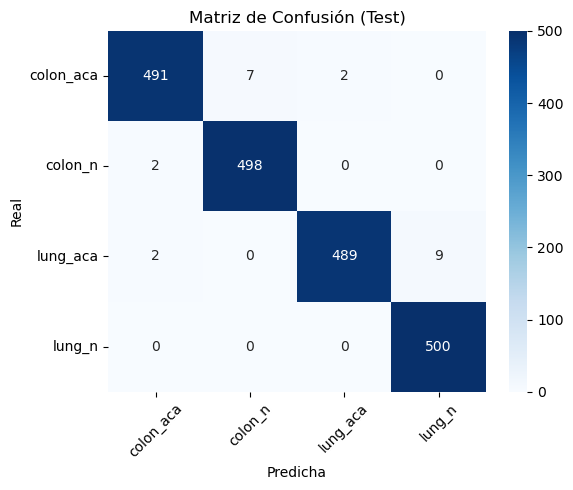

In [76]:
print_confusion_matrix(
    best_resnet50,
    data,
)

Matriz de confusión para Yolo 11

Inferencia: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]


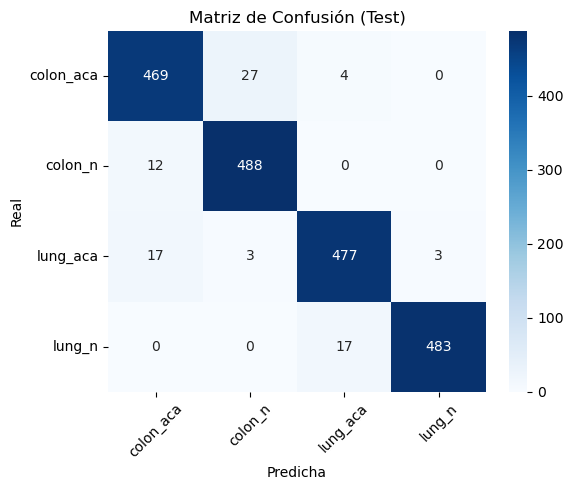

In [77]:
print_confusion_matrix(
    best_yolo11,
    data,
)

Matriz de confusión para Inception v4

Inferencia: 100%|██████████| 32/32 [06:04<00:00, 11.40s/it]


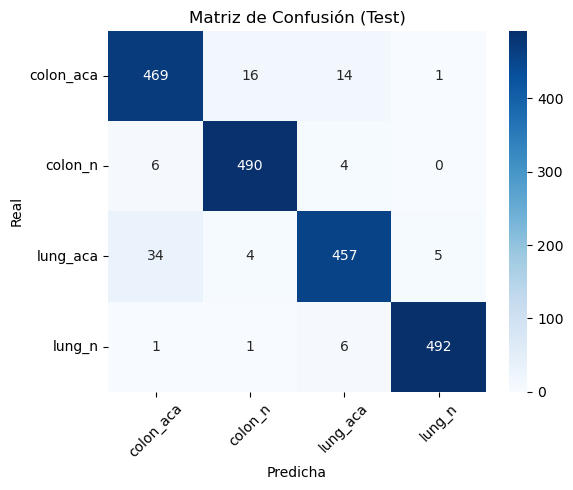

In [78]:
print_confusion_matrix(
    best_inceptionv4,
    data,
)

## Obtención de métricas por clase

A continuación se encuentra el código necesario para obtener estas métricas por cada una de las clases.

In [ ]:
from shared_definitions import get_all_preds_and_labels
from sklearn.metrics import confusion_matrix

def generate_class_metrics_report(model, datamodule, model_name):
    """
    Calcula Accuracy, Recall, Precision, F1-Score y Specificity para cada clase 
    y devuelve un DataFrame de Pandas.
    """
    print(f"Generando reporte de clasificación completo para: {model_name}...")
    
    # Mapeo de las etiquetas originales a los nombres deseados
    class_labels_descriptive = ["colon_nosano", "colon_sano", "pulmon_nosano", "pulmon_sano"]
    
    # Obtenemos las etiquetas reales y las predicciones del conjunto de test
    y_true, y_pred = get_all_preds_and_labels(model, datamodule.test_dataloader())
    
    # Calculamos la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    
    metrics_per_class = []
    
    # Iteramos sobre cada clase para calcular sus métricas individualmente
    for i in range(len(class_labels_descriptive)):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        tn = cm.sum() - (tp + fp + fn)
        
        # Calculamos las métricas
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        metrics_per_class.append({
            "Clase": class_labels_descriptive[i],
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1-Score": f1_score,
            "Specificity": specificity
        })
        
    df_metrics = pd.DataFrame(metrics_per_class).set_index("Clase")
    
    print("Reporte generado.\n")
    return df_metrics

In [52]:
resnet50_class_metrics = generate_class_metrics_report(best_resnet50, data, "ResNet-50")
display(resnet50_class_metrics)

Generando reporte de clasificación completo para: ResNet-50...


Inferencia: 100%|██████████| 32/32 [06:02<00:00, 11.32s/it]

Reporte generado.



,Accuracy,Recall,Precision,F1-Score,Specificity
Clase,,,,,
colon_nosano,0.9935,0.982,0.991919,0.986935,0.997333
colon_sano,0.9955,0.996,0.986139,0.991045,0.995333
pulmon_nosano,0.9935,0.978,0.995927,0.986882,0.998667
pulmon_sano,0.9955,1.000,0.982318,0.991080,0.994000


In [55]:
yolo11_class_metrics = generate_class_metrics_report(best_yolo11, data, "YOLO v11")
display(yolo11_class_metrics)

Generando reporte de clasificación completo para: YOLO v11...


Inferencia: 100%|██████████| 32/32 [00:24<00:00,  1.32it/s]

Reporte generado.



,Accuracy,Recall,Precision,F1-Score,Specificity
Clase,,,,,
colon_nosano,0.970,0.938,0.941767,0.939880,0.980667
colon_sano,0.979,0.976,0.942085,0.958743,0.980000
pulmon_nosano,0.978,0.954,0.957831,0.955912,0.986000
pulmon_sano,0.990,0.966,0.993827,0.979716,0.998000


In [56]:
inceptionv4_class_metrics = generate_class_metrics_report(best_inceptionv4, data, "Inception v4")
display(inceptionv4_class_metrics)

Generando reporte de clasificación completo para: Inception v4...


Inferencia: 100%|██████████| 32/32 [05:49<00:00, 10.92s/it]

Reporte generado.



,Accuracy,Recall,Precision,F1-Score,Specificity
Clase,,,,,
colon_nosano,0.9640,0.938,0.919608,0.928713,0.972667
colon_sano,0.9845,0.980,0.958904,0.969337,0.986000
pulmon_nosano,0.9665,0.914,0.950104,0.931702,0.984000
pulmon_sano,0.9930,0.984,0.987952,0.985972,0.996000


## Análisis agregado

En el estudio primario también se propuso obtener métricas en cuanto a la tarea binaria de clasificación por tipo de tejido vs la clasificación por estado patológico. En esta sección se encuentra el código utilizado para ello.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_aggregated_tasks(model, datamodule, model_name):
    """
    Realiza análisis de agregación para las tareas de clasificación de
    Tipo de Tejido (Colon vs. Pulmón) y Estado Patológico (Sano vs. No Sano).

    Para un modelo dado, esta función:
    1. Obtiene las predicciones originales (4 clases).
    2. Agrega las clases para cada subtarea.
    3. Calcula y muestra una matriz de confusión 2x2 para cada subtarea.
    4. Calcula y muestra una tabla de métricas completas para cada subtarea.
    5. Devuelve los dataframes de métricas para su posterior comparación.
    """
    print(f"--- Iniciando análisis agregado para el modelo: {model_name} ---")
    
    # 1. OBTENER PREDICCIONES ORIGINALES
    y_true, y_pred = get_all_preds_and_labels(model, datamodule.test_dataloader())
    
    # Índices originales: 0:colon_nosano, 1:colon_sano, 2:pulmon_nosano, 3:pulmon_sano
    
    # 2. TAREA 1: AGREGACIÓN POR TIPO DE TEJIDO (Colon vs. Pulmón)
    # Mapeo: Colon -> 0, Pulmón -> 1
    tissue_mapping = {0: 0, 1: 0, 2: 1, 3: 1}
    y_true_tissue = np.vectorize(tissue_mapping.get)(y_true)
    y_pred_tissue = np.vectorize(tissue_mapping.get)(y_pred)
    tissue_labels = ["Colon", "Pulmón"]
    
    # 3. TAREA 2: AGREGACIÓN POR ESTADO PATOLÓGICO (Sano vs. No Sano)
    # Mapeo: No Sano -> 0, Sano -> 1
    state_mapping = {0: 0, 1: 1, 2: 0, 3: 1}
    y_true_state = np.vectorize(state_mapping.get)(y_true)
    y_pred_state = np.vectorize(state_mapping.get)(y_pred)
    state_labels = ["No Sano", "Sano"]

    # Función auxiliar para calcular métricas y visualizar
    def _calculate_and_display(y_true_agg, y_pred_agg, task_name, class_labels):
        # Calcular Matriz de Confusión 2x2
        cm_agg = confusion_matrix(y_true_agg, y_pred_agg)
        
        # Visualizar Matriz
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm_agg, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=class_labels, yticklabels=class_labels)
        plt.title(f'Matriz de Confusión - {task_name}\n({model_name})')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.show()

        # Calcular Métricas Binarias
        tn, fp, fn, tp = cm_agg.ravel()
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        metrics = {
            "Accuracy": accuracy, "Recall (Sensitivity)": recall, "Specificity": specificity,
            "Precision": precision, "F1-Score": f1_score
        }
        df_metrics = pd.DataFrame([metrics])
        
        print(f"Métricas de Rendimiento - {task_name} ({model_name}):")
        display(df_metrics)
        return df_metrics

    # Ejecutar para ambas tareas
    print("\n[ TAREA: TIPO DE TEJIDO ]")
    tissue_metrics = _calculate_and_display(y_true_tissue, y_pred_tissue, "Tipo de Tejido", tissue_labels)
    
    print("\n[ TAREA: ESTADO PATOLÓGICO ]")
    state_metrics = _calculate_and_display(y_true_state, y_pred_state, "Estado Patológico", state_labels)
    
    print(f"--- Análisis para {model_name} completado ---\n")
    return tissue_metrics, state_metrics

--- Iniciando análisis agregado para el modelo: ResNet-50 ---


Inferencia: 100%|██████████| 32/32 [06:03<00:00, 11.36s/it]



[ TAREA: TIPO DE TEJIDO ]


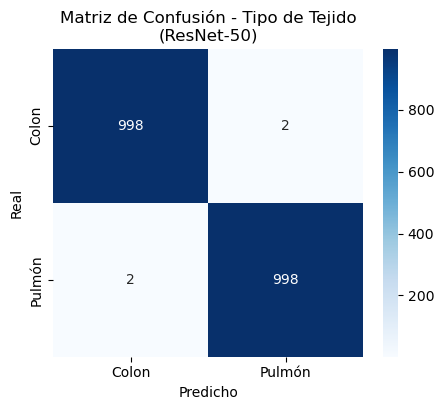

Métricas de Rendimiento - Tipo de Tejido (ResNet-50):


,Accuracy,Recall (Sensitivity),Specificity,Precision,F1-Score
0,0.998,0.998,0.998,0.998,0.998



[ TAREA: ESTADO PATOLÓGICO ]


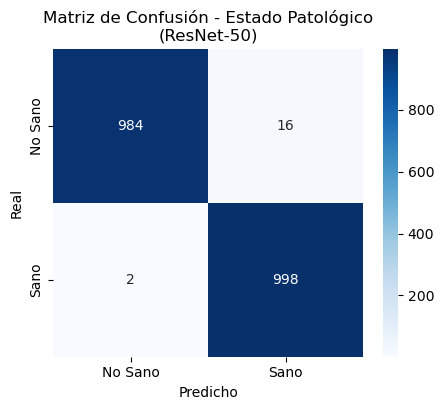

Métricas de Rendimiento - Estado Patológico (ResNet-50):


,Accuracy,Recall (Sensitivity),Specificity,Precision,F1-Score
0,0.991,0.998,0.984,0.984221,0.991063


--- Análisis para ResNet-50 completado ---

--- Iniciando análisis agregado para el modelo: YOLO v11 ---


Inferencia: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


[ TAREA: TIPO DE TEJIDO ]


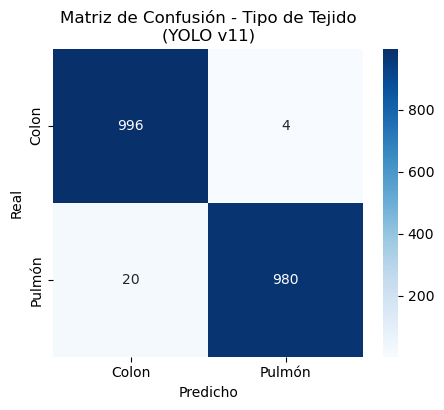

Métricas de Rendimiento - Tipo de Tejido (YOLO v11):


,Accuracy,Recall (Sensitivity),Specificity,Precision,F1-Score
0,0.988,0.98,0.996,0.995935,0.987903



[ TAREA: ESTADO PATOLÓGICO ]


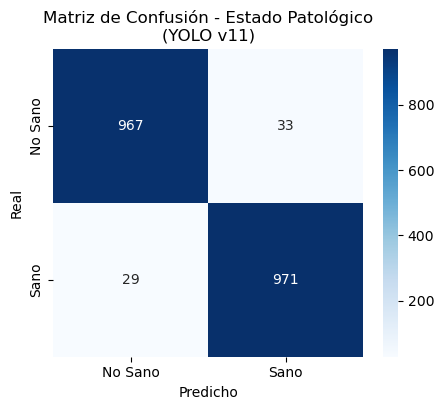

Métricas de Rendimiento - Estado Patológico (YOLO v11):


,Accuracy,Recall (Sensitivity),Specificity,Precision,F1-Score
0,0.969,0.971,0.967,0.967131,0.969062


--- Análisis para YOLO v11 completado ---

--- Iniciando análisis agregado para el modelo: Inception v4 ---


Inferencia: 100%|██████████| 32/32 [06:01<00:00, 11.29s/it]


[ TAREA: TIPO DE TEJIDO ]


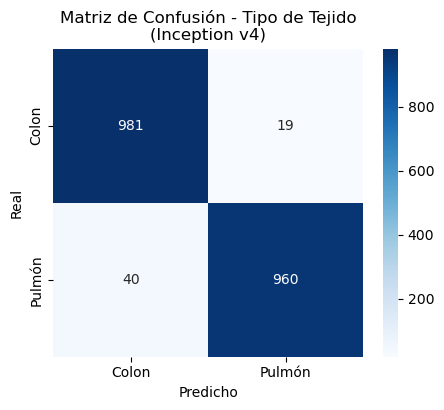

Métricas de Rendimiento - Tipo de Tejido (Inception v4):


,Accuracy,Recall (Sensitivity),Specificity,Precision,F1-Score
0,0.9705,0.96,0.981,0.980592,0.970187



[ TAREA: ESTADO PATOLÓGICO ]


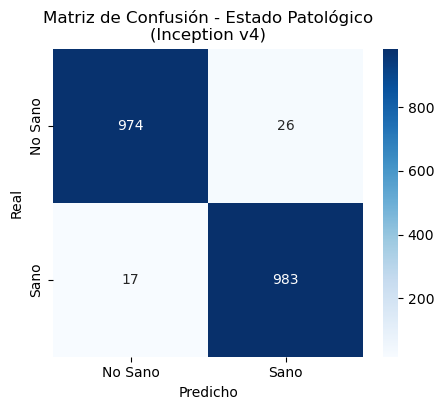

Métricas de Rendimiento - Estado Patológico (Inception v4):


,Accuracy,Recall (Sensitivity),Specificity,Precision,F1-Score
0,0.9785,0.983,0.974,0.974232,0.978596


--- Análisis para Inception v4 completado ---



In [80]:
# Analizar ResNet-50
resnet_tissue_metrics, resnet_state_metrics = analyze_aggregated_tasks(best_resnet50, data, "ResNet-50")

# Analizar Yolo v11
yolo_tissue_metrics, yolo_state_metrics = analyze_aggregated_tasks(best_yolo11, data, "YOLO v11")

# Analizar Inception v4
inception_tissue_metrics, inception_state_metrics = analyze_aggregated_tasks(best_inceptionv4, data, "Inception v4")

In [81]:
# Añadir identificadores de modelo y tarea a cada dataframe
resnet_tissue_metrics['Model'] = 'ResNet-50'
resnet_tissue_metrics['Task'] = 'Tipo de Tejido'
resnet_state_metrics['Model'] = 'ResNet-50'
resnet_state_metrics['Task'] = 'Estado Patológico'

yolo_tissue_metrics['Model'] = 'YOLO v11'
yolo_tissue_metrics['Task'] = 'Tipo de Tejido'
yolo_state_metrics['Model'] = 'YOLO v11'
yolo_state_metrics['Task'] = 'Estado Patológico'

inception_tissue_metrics['Model'] = 'Inception v4'
inception_tissue_metrics['Task'] = 'Tipo de Tejido'
inception_state_metrics['Model'] = 'Inception v4'
inception_state_metrics['Task'] = 'Estado Patológico'

# Concatenar todos los resultados
comparison_df = pd.concat([
    resnet_tissue_metrics, resnet_state_metrics,
    yolo_tissue_metrics, yolo_state_metrics,
    inception_tissue_metrics, inception_state_metrics
], ignore_index=True)

print("Tabla de comparación consolidada:")
display(comparison_df)

Tabla de comparación consolidada:


,Accuracy,Recall (Sensitivity),Specificity,Precision,F1-Score,Model,Task
0,0.9980,0.998,0.998,0.998000,0.998000,ResNet-50,Tipo de Tejido
1,0.9910,0.998,0.984,0.984221,0.991063,ResNet-50,Estado Patológico
2,0.9880,0.980,0.996,0.995935,0.987903,YOLO v11,Tipo de Tejido
3,0.9690,0.971,0.967,0.967131,0.969062,YOLO v11,Estado Patológico
4,0.9705,0.960,0.981,0.980592,0.970187,Inception v4,Tipo de Tejido
5,0.9785,0.983,0.974,0.974232,0.978596,Inception v4,Estado Patológico


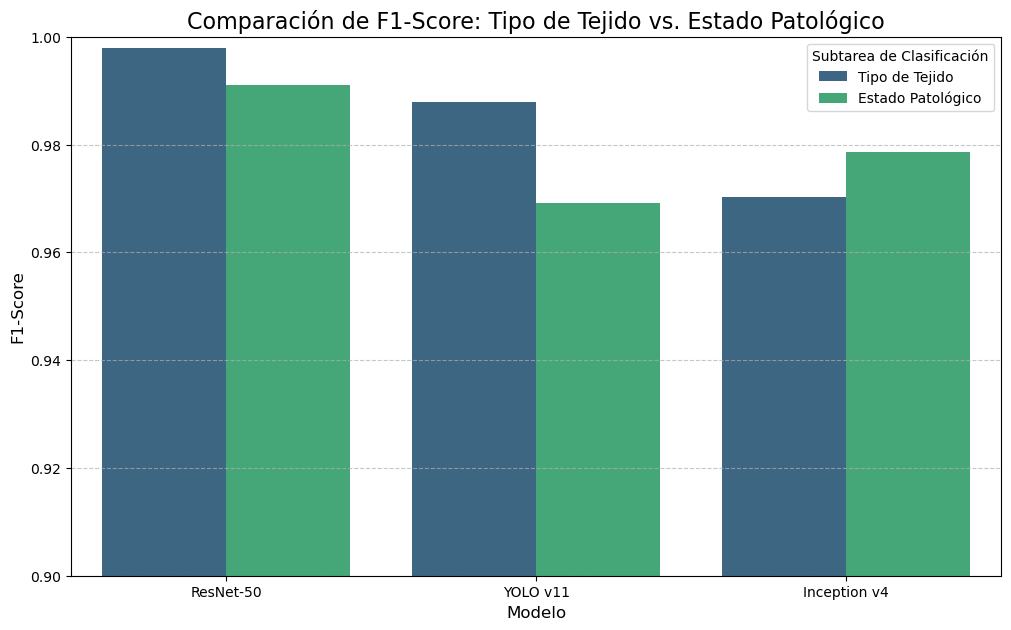

In [82]:
plt.figure(figsize=(12, 7))
sns.barplot(data=comparison_df, x='Model', y='F1-Score', hue='Task', palette='viridis')

plt.title('Comparación de F1-Score: Tipo de Tejido vs. Estado Patológico', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.ylim(0.9, 1.0) # Ajusta el límite para una mejor visualización de las diferencias
plt.legend(title='Subtarea de Clasificación')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()